<a href="https://colab.research.google.com/github/SilvanaCicchitti/challenge_telecom/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [59]:
import pandas as pd
import numpy as np
url='https://raw.githubusercontent.com/SilvanaCicchitti/challenge_telecom/refs/heads/main/TelecomX_Data.json'

In [60]:
datos= pd.read_json(url)
datos.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Diccionario


Diccionario de datos

**customerID**: número de identificación único de cada cliente

**Churn**: si el cliente dejó o no la empresa

**gender**: género (masculino y femenino)

**SeniorCitizen**: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

**Partner**: si el cliente tiene o no una pareja

**Dependents**: si el cliente tiene o no dependientes

**tenure**: meses de contrato del cliente

**PhoneService**: suscripción al servicio telefónico

**MultipleLines**: suscripción a más de una línea telefónica

**InternetService**: suscripción a un proveedor de internet

**OnlineSecurity**: suscripción adicional de seguridad en línea

**OnlineBackup**: suscripción adicional de respaldo en línea

**DeviceProtection**: suscripción adicional de protección del dispositivo

**TechSupport**: suscripción adicional de soporte técnico, menor tiempo de espera

**StreamingTV**: suscripción de televisión por cable

**StreamingMovies**: suscripción de streaming de películas

**Contract**: tipo de contrato

**PaperlessBilling**: si el cliente prefiere recibir la factura en línea

**PaymentMethod**: forma de pago

**Charges.Monthly**: total de todos los servicios del cliente por mes

**Charges.Total**: total gastado por el cliente

#🔧 Transformación

¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

In [61]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [62]:
columnas = list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [63]:
# Columnas simples
base = datos[['customerID', 'Churn']]

# Normalizar columnas anidadas
customer = pd.json_normalize(datos['customer'])
phone = pd.json_normalize(datos['phone'])
internet = pd.json_normalize(datos['internet'])
account = pd.json_normalize(datos['account'])

# Unir todo
datos_normalizados = pd.concat([base, customer, phone, internet, account], axis=1)

# Ver resultado
datos_normalizados.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2725,3774-VBNXY,No,Female,0,Yes,Yes,64,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.20,1277.75
6056,8263-QMNTJ,No,Male,0,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,115.55,8425.3
3850,5274-XHAKY,No,Female,0,Yes,Yes,41,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),94.30,3893.6
521,0739-UUAJR,No,Female,0,Yes,Yes,72,No,No phone service,DSL,...,No,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),53.80,3952.45
1594,2266-FUBDZ,No,Male,0,Yes,Yes,15,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,278.85
6836,9430-FRQOC,Yes,Female,0,No,Yes,4,Yes,Yes,Fiber optic,...,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,87.10,341.45
5752,7856-GANIL,No,Male,1,Yes,No,45,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),98.70,4525.8
3164,4418-LZMSV,No,Male,0,Yes,Yes,13,Yes,No,DSL,...,Yes,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic),61.80,750.1
460,0655-RBDUG,Yes,Male,0,No,No,7,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.05,713
6295,8654-DHAOW,No,Female,0,No,No,2,Yes,Yes,DSL,...,Yes,No,No,No,No,Month-to-month,No,Mailed check,54.15,101.65


In [64]:
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [65]:
datos_normalizados.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [66]:
columnas2 = list(datos_normalizados.columns)
columnas2

for col in columnas2:
  #print(col)
  print(col, datos_normalizados[col].unique(), end='\n\n')

customerID ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn ['No' 'Yes' '']

gender ['Female' 'Male']

SeniorCitizen [0 1]

Partner ['Yes' 'No']

Dependents ['Yes' 'No']

tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

PhoneService ['Yes' 'No']

MultipleLines ['No' 'Yes' 'No phone service']

InternetService ['DSL' 'Fiber optic' 'No']

OnlineSecurity ['No' 'Yes' 'No internet service']

OnlineBackup ['Yes' 'No' 'No internet service']

DeviceProtection ['No' 'Yes' 'No internet service']

TechSupport ['Yes' 'No' 'No internet service']

StreamingTV ['Yes' 'No' 'No internet service']

StreamingMovies ['No' 'Yes' 'No internet service']

Contract ['One year' 'Month-to-month' 'Two year']

PaperlessBilling ['Yes' 'No']

PaymentMethod ['Mailed check' 'Electronic check' 'Cre

### Valores nulos Churn

In [67]:
valores_blancos_vacios = datos_normalizados.apply(lambda x: x.astype(str).str.strip()=='').sum()
print(valores_blancos_vacios)

customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64


In [68]:
#churn valores en blanco
datos_normalizados['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [69]:
datos_normalizados['Churn'].isna().sum()

np.int64(0)

In [70]:
# Eliminar filas con 'Churn' vacía o con solo espacios
datos2 = datos_normalizados[datos_normalizados['Churn'].str.strip() != '']
datos2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [71]:
#verificación
datos2['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [72]:
# Eliminar filas con 'Charges.Total' vacía o con solo espacios
datos2 = datos2[datos2['Charges.Total'].str.strip() != '']
datos2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [73]:
#verificación
valores_blancos_vacios = datos2.apply(lambda x: x.astype(str).str.strip()=='').sum()
print(valores_blancos_vacios)

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [74]:
datos2.tail(5)
#quedaron mal los índices. Hay que resetear

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [75]:
datos2.reset_index(drop=True, inplace=True)
datos2.tail(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7027,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7028,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7029,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7030,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7031,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


### Pasar a int: tenure, Charges.Monthly, Charges.Total




In [76]:
#tenure tiene un espacio
#datos2['tenure'].isna().sum()
#datos2['Charges.Monthly'].isna().sum()
#datos2['Charges.Total'].isna().sum()

In [77]:
columnas_numericas= ['tenure', 'Charges.Monthly', 'Charges.Total']
datos2[columnas_numericas] = datos2[columnas_numericas].replace(' ', np.nan)

In [78]:
columnas_numericas= ['tenure', 'Charges.Monthly', 'Charges.Total']
datos2[columnas_numericas]= datos2[columnas_numericas].astype(np.float64)
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   float64
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


### Transformar a boleanos= Churn y Senior Citizen

Churn ['No' 'Yes']

SeniorCitizen [0 1]

Partner ['Yes' 'No']

Dependents ['Yes' 'No']

PhoneService ['Yes' 'No']

PaperlessBilling ['Yes' 'No']



In [79]:
#única columna es una serie // apply sólo para series
#2 o más columnas es un df // usar applymap
columnas_booleanas= ['Churn','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
datos2[columnas_booleanas]= datos2[columnas_booleanas].applymap(lambda x: x.replace('Yes', '1').replace('No', '0').strip())
datos2[columnas_booleanas]

<ipython-input-79-1421755652>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos2[columnas_booleanas]= datos2[columnas_booleanas].applymap(lambda x: x.replace('Yes', '1').replace('No', '0').strip())


,Churn,Partner,Dependents,PhoneService,PaperlessBilling
0,0,1,1,1,1
1,0,0,0,1,0
2,1,0,0,1,1
3,1,1,0,1,1
4,1,1,0,1,1
...,...,...,...,...,...
7027,0,0,0,1,0
7028,1,1,0,1,1
7029,0,0,0,1,1
7030,0,1,1,1,0


In [ ]:
#SeniorCitizen [0 1]  no me dejaba porque es int
# Este código convierte a booleano ya que sólo hay 0 y 1
datos2['SeniorCitizen'] = datos2['SeniorCitizen'] == 1
datos2['SeniorCitizen']


,SeniorCitizen
0,False
1,False
2,False
3,True
4,True
...,...
7027,False
7028,False
7029,False
7030,False


In [ ]:
datos2[columnas_booleanas]= datos2[columnas_booleanas].astype(np.bool)
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   bool   
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   bool   
 4   Partner           7032 non-null   bool   
 5   Dependents        7032 non-null   bool   
 6   tenure            7032 non-null   float64
 7   PhoneService      7032 non-null   bool   
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


### Columna de cuentas diarias

In [ ]:
datos2['Charges.Daily'] = (datos2['Charges.Monthly'] / 30).round(2)
datos2.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,True,Female,False,True,True,9.0,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,True,Male,False,True,True,9.0,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,True,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,True,Male,False,True,True,4.0,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,True,Male,True,True,True,13.0,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,True,Female,True,True,True,3.0,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.80


In [ ]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   bool   
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   bool   
 4   Partner           7032 non-null   bool   
 5   Dependents        7032 non-null   bool   
 6   tenure            7032 non-null   float64
 7   PhoneService      7032 non-null   bool   
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


#📊 Carga y análisis

### Análisis descriptivo

In [ ]:
datos2.describe()

,tenure,Charges.Monthly,Charges.Total,Charges.Daily
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159891
std,24.545260,30.085974,2266.771362,1.002955
min,1.000000,18.250000,18.800000,0.610000
25%,9.000000,35.587500,401.450000,1.187500
50%,29.000000,70.350000,1397.475000,2.340000
75%,55.000000,89.862500,3794.737500,2.992500
max,72.000000,118.750000,8684.800000,3.960000


### Distribución de evasión

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# ejemplo guía
#fig, ax= plt.subplots(figsize=(8,4))
#ax.plot(datos_col['Año'], datos_col['Inmigrantes'])
#ax.xaxis.set_major_locator(plt.MultipleLocator(5)) #de 5 en 5
#ax.set_title('Inmigración de colombianos hacia Canadá\n1980-2013')
#ax.set_xlabel('Año')
#ax.set_ylabel('Número de Inmigrantes')
#plt.show()

#axs[1].boxplot(datos_col['Inmigrantes'])
#axs[1].set_title('Boxplot de inmigración de colombianos\nhacia Canadá 1980-2013')
#axs[1].set_xlabel('Colombia')
#axs[1].set_ylabel('Número de inmigrantes')
#axs[1].grid()

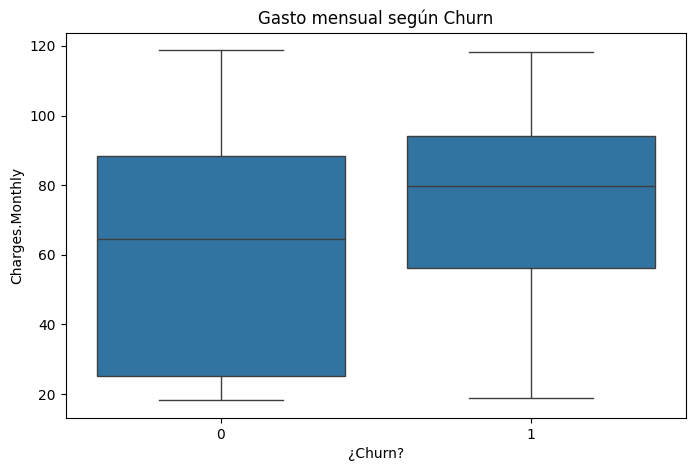

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charges.Monthly', data=datos2)
plt.title('Gasto mensual según Churn')
plt.xlabel('¿Churn?')
plt.ylabel('Charges.Monthly')
plt.show()

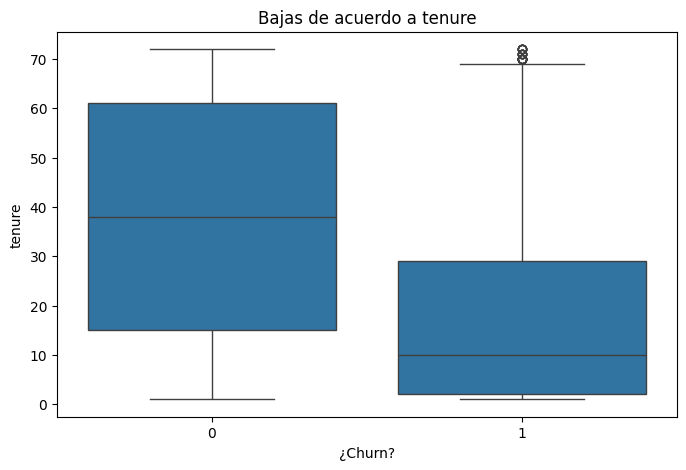

In [84]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=datos2)
plt.title('Bajas de acuerdo a tenure')
plt.xlabel('¿Churn?')
plt.ylabel('tenure')
plt.show()

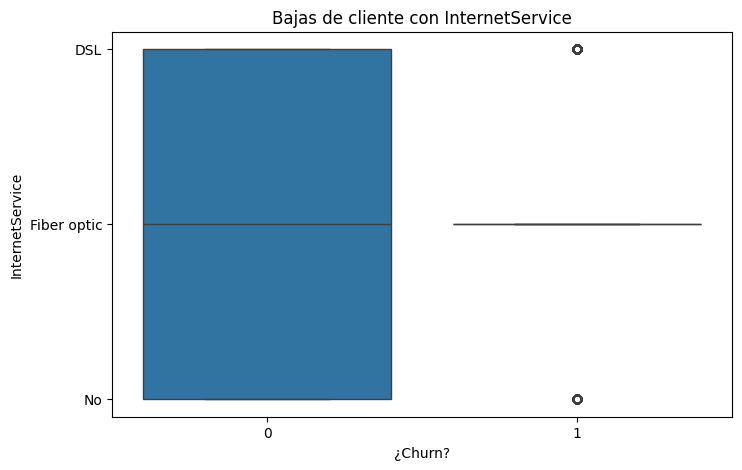

In [85]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='InternetService', data=datos2)
plt.title('Bajas de cliente con InternetService')
plt.xlabel('¿Churn?')
plt.ylabel('InternetService')
plt.show()

#📄Informe final